In [1]:
# This part for Google Colabratory sir, I studied there for speed. 

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# check version
import tensorflow as tf
print(tf.__version__)
import warnings
warnings.filterwarnings("ignore")

2.4.1


In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (X_test, y_test) = fashion_mnist.load_data()

In [33]:
X_train, X_valid = train_images[:40000], train_images[40000:]
y_train, y_valid = train_labels[:40000], train_labels[40000:]

In [34]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [35]:
print('Train      : ', X_train.shape)
print('Validation : ', X_valid.shape)
print('Test       : ', X_test.shape)

Train      :  (40000, 28, 28)
Validation :  (20000, 28, 28)
Test       :  (10000, 28, 28)


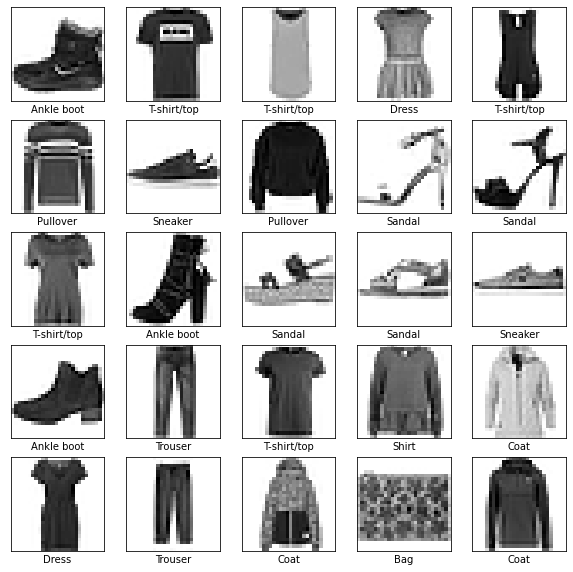

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Simple Sequential Model V1

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

In [38]:
#Lets start with a traditional network: single hidden layer, sigmoid activation functions, and SGD as optimizer

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [39]:
numberOfEpochs = 25

In [40]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='sgd',
               metrics=['accuracy'])

In [41]:
h = model1.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9662 - accuracy: 0.4360 - val_loss: 1.2461 - val_accuracy: 0.7075
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1476 - accuracy: 0.7090 - val_loss: 0.9347 - val_accuracy: 0.7350
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8987 - accuracy: 0.7373 - val_loss: 0.7963 - val_accuracy: 0.7492
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7797 - accuracy: 0.7560 - val_loss: 0.7185 - val_accuracy: 0.7652
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7076 - accuracy: 0.7717 - val_loss: 0.6682 - val_accuracy: 0.7772
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6589 - accuracy: 0.7802 - val_loss: 0.6316 - val_accuracy: 0.7854
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6274 - accuracy: 0.7885 - val_loss: 0.6035 - val_accuracy:

In [42]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


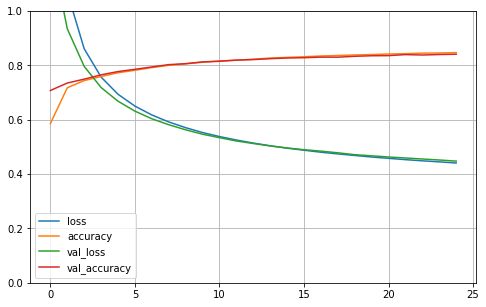

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [73]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    img = img.reshape(img.shape[0], img.shape[1])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

In [45]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [46]:
def show_example_prediction(i, predictions):
    print('Probability of output neurons for first tet data:\n', predictions[i])
    print()

    print('Neuron having maximum probability (prediction) is ', np.argmax(predictions[i]), ' and corresponding label is ', class_names[np.argmax(predictions[i])])
    print('True label index ', y_test[i], ' and corresponding label is ', class_names[y_test[i]])
    print()

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  y_test)
    plt.show()

In [47]:
def show_15_predictions(predictions):
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], y_test, X_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], y_test)
    plt.tight_layout()
    plt.show()    

Probability of output neurons for first tet data:
 [-1.507635   -2.5435362  -2.536901   -1.0907632  -1.760961    3.9305065
 -0.54406416  4.533255    1.3124042   5.3295493 ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



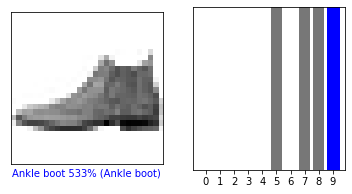

In [48]:
predictions = model1.predict(X_test)

show_example_prediction(0, predictions)

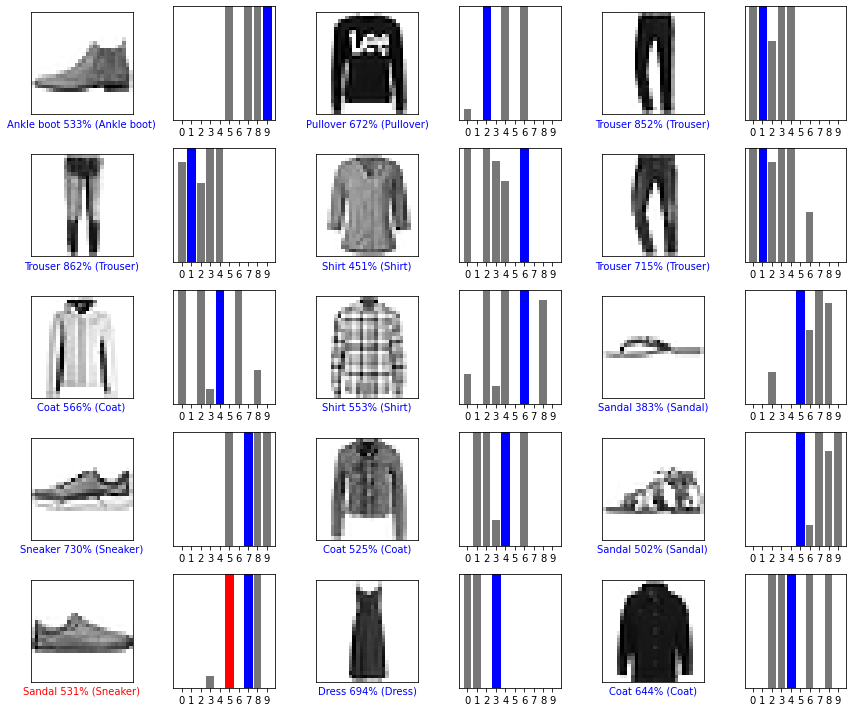

In [49]:
show_15_predictions(predictions)

In [50]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8302000164985657


<b>Student comments </b>: Firstly, we apply the flattening process in our model, then connect it to 32 neurons and we can see that the relu as the activation function in these neurons. While compiling our model, we see that we chose Stochastic gradient descent as optimizer and SparseCategoricalCrossentropy as loss function.When we use stochastic gradient descent, we can say that the compile process takes a little longer because we send only one data at each iteration, and if we look at our graph, we can see that our loss value decreases a little slower. Using the sigmoid function as the activation function in our Hidden Layer shows that we may have encountered a vanishing gradient problem. As a result, we can say that we achieved 83 percent accuracy with this model.

# Simple Sequential Model V2

In [51]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [52]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='Adam',              
               metrics=['accuracy'])

In [53]:
h = model2.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7649 - accuracy: 0.7433 - val_loss: 0.4717 - val_accuracy: 0.8342
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4542 - accuracy: 0.8452 - val_loss: 0.4273 - val_accuracy: 0.8519
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4089 - accuracy: 0.8572 - val_loss: 0.4532 - val_accuracy: 0.8375
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3880 - accuracy: 0.8598 - val_loss: 0.3999 - val_accuracy: 0.8612
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8673 - val_loss: 0.3828 - val_accuracy: 0.8680
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3492 - accuracy: 0.8760 - val_loss: 0.3738 - val_accuracy: 0.8705
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3417 - accuracy: 0.8762 - val_loss: 0.3729 - val_accuracy:

In [54]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


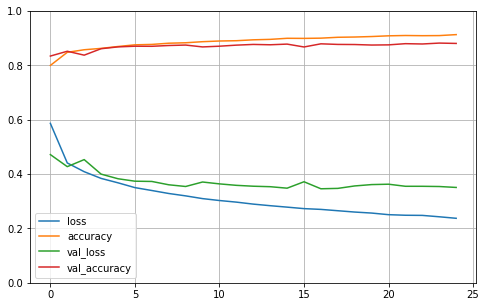

In [55]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first tet data:
 [-13.497734  -25.476439   -8.507717  -21.066166   -8.455241   -1.7780036
 -10.2412615   1.2921305  -9.888601    4.180823 ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



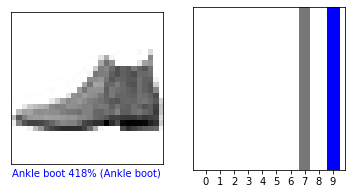

In [56]:
predictions = model2.predict(X_test)

show_example_prediction(0, predictions)

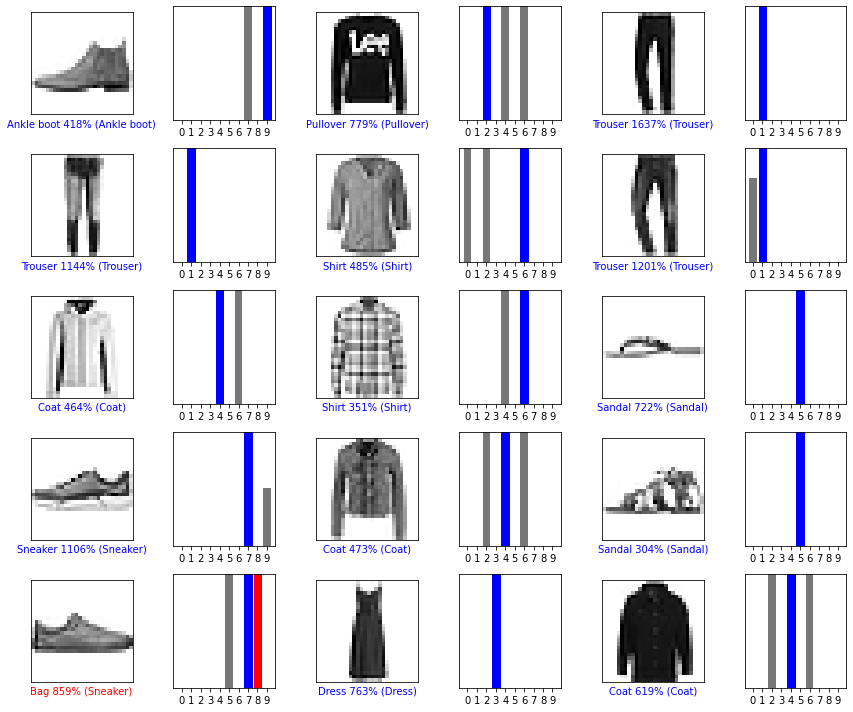

In [57]:
show_15_predictions(predictions)

In [58]:
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8694000244140625


<b>Student comments </b>: Compared to the V1 model, we see that we have changed our activation function on our hidden layer and our optimizer during compiling of our model. After these changes, we see that the accuracy of our model has increased to approximately 87%. I think that the reason for our success increase of 4%  is that we used the relu function in hidden layers and prevented the vanishing gradient problem while updating our weights.In addition, using adam as an optimizer may have provided rapid loss reduction and accuracy increase compared to using SGD.

# Simple Sequential Model V3

In [59]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [60]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='Adam',              
               metrics=['accuracy'])

In [61]:
h = model3.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7769 - accuracy: 0.7338 - val_loss: 0.5283 - val_accuracy: 0.8061
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4226 - accuracy: 0.8492 - val_loss: 0.4070 - val_accuracy: 0.8547
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3686 - accuracy: 0.8679 - val_loss: 0.3698 - val_accuracy: 0.8719
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8775 - val_loss: 0.3504 - val_accuracy: 0.8722
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.8800 - val_loss: 0.3399 - val_accuracy: 0.8763
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.8899 - val_loss: 0.3445 - val_accuracy: 0.8775
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2885 - accuracy: 0.8937 - val_loss: 0.3385 - val_accuracy:

In [62]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


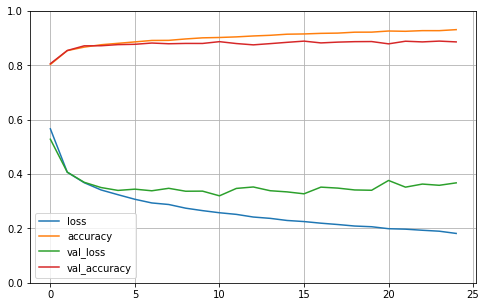

In [63]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first tet data:
 [ -8.524724  -16.177729  -16.862469  -13.866216   -9.248066   -4.2500453
  -9.230508    4.625045  -10.810749   10.420369 ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



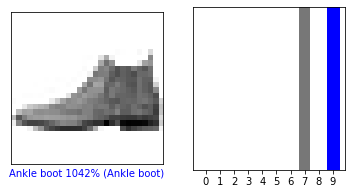

In [64]:
predictions = model3.predict(X_test)

show_example_prediction(0, predictions)

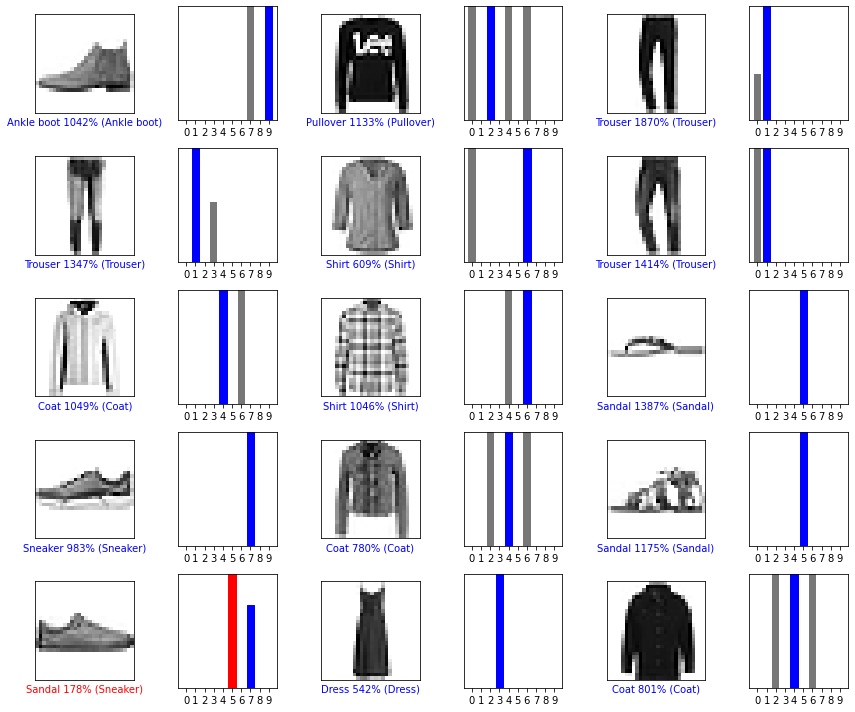

In [65]:
show_15_predictions(predictions)

In [66]:
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8762000203132629


<b>Student comments </b>: If we compare it with V2, we see that a new hidden layer with 64 neurons has been added. However, the addition of this hidden layer shows that there is a little improvement in our accuracy score and if we look at our graph, we can see that it may cause overfitting problem.

# CNN Model

In [67]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [68]:
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPool2D, Dropout

In [152]:
def CNN_model():
    return Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(128,(3,3),padding='same',activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dropout(0.3),
    Dense(256,activation = 'relu'),
    Dropout(0.3),
    Dense(10, activation = 'softmax')
    ])

In [153]:
CNN_model = CNN_model() 

In [154]:
CNN_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [155]:
import timeit

batch_size = 100
epochs = 25

%time 
h = CNN_model.fit(X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_valid,y_valid)
)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Epoch 1/25
400/400 [==============================] - 3s 6ms/step - loss: 1.1685 - accuracy: 0.5564 - val_loss: 0.4516 - val_accuracy: 0.8295
Epoch 2/25
400/400 [==============================] - 2s 5ms/step - loss: 0.5012 - accuracy: 0.8154 - val_loss: 0.3570 - val_accuracy: 0.8676
Epoch 3/25
400/400 [==============================] - 2s 5ms/step - loss: 0.4095 - accuracy: 0.8492 - val_loss: 0.3154 - val_accuracy: 0.8852
Epoch 4/25
400/400 [==============================] - 2s 6ms/step - loss: 0.3720 - accuracy: 0.8644 - val_loss: 0.2953 - val_accuracy: 0.8921
Epoch 5/25
400/400 [==============================] - 2s 6ms/step - loss: 0.3296 - accuracy: 0.8833 - val_loss: 0.2749 - val_accuracy: 0.8990
Epoch 6/25
400/400 [==============================] - 2s 6ms/step - loss: 0.3285 - accuracy: 0.8773 - val_loss: 0.2706 - val_accuracy: 0.8991
Epoch 7/25
400/400 [==============================] - 2s 6ms/step - loss: 0.2985 - a

In [156]:
CNN_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (100, 28, 28, 32)         320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (100, 14, 14, 32)         0         
_________________________________________________________________
dropout_31 (Dropout)         (100, 14, 14, 32)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (100, 14, 14, 64)         18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (100, 7, 7, 64)           0         
_________________________________________________________________
dropout_32 (Dropout)         (100, 7, 7, 64)           0         
_________________________________________________________________
conv2d_26 (Conv2D)           (100, 7, 7, 128)        

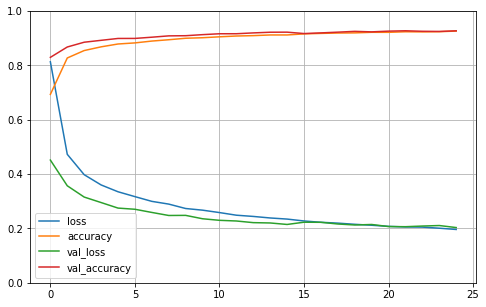

In [157]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first tet data:
 [7.3455703e-12 1.2723316e-12 1.1693480e-10 2.4052326e-11 2.1338477e-10
 5.2284463e-07 4.9912498e-11 1.3640298e-05 3.9498704e-12 9.9998581e-01]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



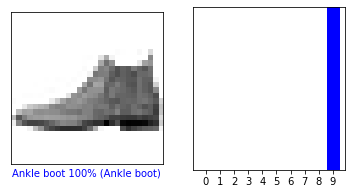

In [158]:
predictions = CNN_model.predict(X_test)

show_example_prediction(0, predictions)

In [159]:
test_loss, test_acc = CNN_model.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9194999933242798


<b>Student comments </b>: First of all, I started my model by applying number of 32 filters and by (3,3) shape. While applying this process, I used "relu" as the activation function. After applying the convolution process, I used same padding to avoid any loss of size. Then, by applying max pooling at (2,2) size, we took the maximum values in each of our (2,2) pixels and took the important features.When applying this process, I set the stride value as 2, and I shifted 2 pixels to continue this process until all pixels are scanned.Finally, in order to prevent overfitting, I used the structure called Dropout that allows weights to be removed at a specified ratio. I continued this whole process 2 more times by changing the number of filters to 64 and 128. After this process was over, I prepared my fully connected layer using the Flatten function.After the values that we obtained became a one-dimensional vector, I applied classical neural network operations. I used relu activation function in hidden layer to prevent vanishing gradient problem.Also I used Dropout after each hidden layer to prevent overfitting.

I completed my model with 92 percent accuracy. And if we look at the graphics, I also prevented overfitting.